In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

# Load  dataset
data = pd.read_csv('/content/yahoo_stock.csv')

# Feature selection and preprocessing
data = data[['Date', 'Close']]  # Use 'Close' price for prediction
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the time step (lookback period)
time_step = 60  # Number of days to look back

# Prepare training data
X_train, y_train = [], []
for i in range(time_step, len(scaled_data)):
    X_train.append(scaled_data[i-time_step:i, 0])
    y_train.append(scaled_data[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshape the data to 3D [samples, time_steps, features] for LSTM input
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))  # Output layer

# Compile and fit the model
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=25, batch_size=32)

# Prepare the test data for prediction
test_data = scaled_data[-time_step:]
X_test = []
X_test.append(test_data[:, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Make predictions
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)

print(f"Predicted future price: {predicted_price[0, 0]}")


Epoch 1/25
56/56 [==============================] - 8s 73ms/step - loss: 0.0300
Epoch 2/25
56/56 [==============================] - 4s 67ms/step - loss: 0.0044
Epoch 3/25
56/56 [==============================] - 3s 56ms/step - loss: 0.0038
Epoch 4/25
56/56 [==============================] - 3s 55ms/step - loss: 0.0040
Epoch 5/25
56/56 [==============================] - 4s 71ms/step - loss: 0.0034
Epoch 6/25
56/56 [==============================] - 4s 64ms/step - loss: 0.0032
Epoch 7/25
56/56 [==============================] - 3s 55ms/step - loss: 0.0033
Epoch 8/25
56/56 [==============================] - 3s 56ms/step - loss: 0.0028
Epoch 9/25
56/56 [==============================] - 4s 75ms/step - loss: 0.0026
Epoch 10/25
56/56 [==============================] - 3s 62ms/step - loss: 0.0031
Epoch 11/25
56/56 [==============================] - 3s 56ms/step - loss: 0.0025
Epoch 12/25
56/56 [==============================] - 3s 55ms/step - loss: 0.0026
Epoch 13/25
56/56 [==================

Epoch 1/25
45/45 [==============================] - 7s 79ms/step - loss: 0.0159 - val_loss: 0.0078
Epoch 2/25
45/45 [==============================] - 3s 73ms/step - loss: 0.0030 - val_loss: 0.0040
Epoch 3/25
45/45 [==============================] - 4s 85ms/step - loss: 0.0022 - val_loss: 0.0041
Epoch 4/25
45/45 [==============================] - 3s 60ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 5/25
45/45 [==============================] - 3s 59ms/step - loss: 0.0019 - val_loss: 0.0036
Epoch 6/25
45/45 [==============================] - 3s 60ms/step - loss: 0.0019 - val_loss: 0.0035
Epoch 7/25
45/45 [==============================] - 4s 82ms/step - loss: 0.0017 - val_loss: 0.0034
Epoch 8/25
45/45 [==============================] - 3s 70ms/step - loss: 0.0017 - val_loss: 0.0036
Epoch 9/25
45/45 [==============================] - 3s 59ms/step - loss: 0.0016 - val_loss: 0.0035
Epoch 10/25
45/45 [==============================] - 3s 59ms/step - loss: 0.0018 - val_loss: 0.0055
Epoch 11/

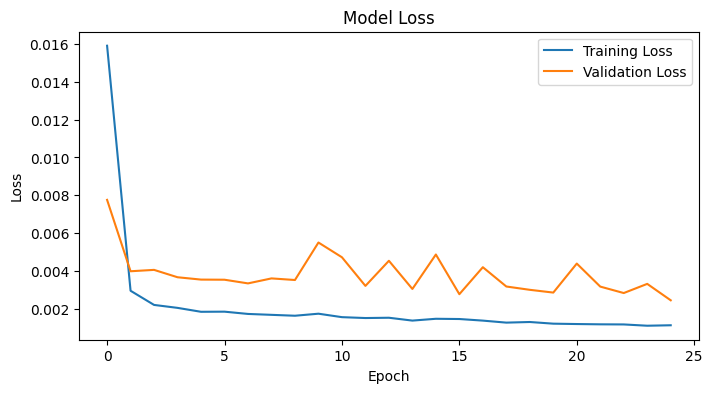

12/12 [==============================] - 1s 16ms/step
Mean Squared Error (MSE): 7958.134536956762
Mean Absolute Error (MAE): 63.92873929377656
Root Mean Squared Error (RMSE): 89.2083770559512
Mean Absolute Percentage Error (MAPE): 2.1209509136500935%


In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/yahoo_stock.csv')

# Feature selection and preprocessing
data = data[['Date', 'Close']]
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Define the time step (lookback period)
time_step = 60  # Number of days to look back

# Prepare data
X, y = [], []
for i in range(time_step, len(scaled_data)):
    X.append(scaled_data[i-time_step:i, 0])
    y.append(scaled_data[i, 0])
X, y = np.array(X), np.array(y)

# Reshape the data to 3D [samples, time_steps, features] for LSTM input
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Split into training and validation sets (80% training, 20% validation)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_val, y_val = X[train_size:], y[train_size:]

# Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model with validation data
history = model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_val, y_val))

# Plot training & validation loss values
plt.figure(figsize=(8, 4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Make predictions on the validation set
predictions = model.predict(X_val)
predictions = scaler.inverse_transform(predictions)
y_val_actual = scaler.inverse_transform(y_val.reshape(-1, 1))

# Evaluate the model using different metrics
mse = mean_squared_error(y_val_actual, predictions)
mae = mean_absolute_error(y_val_actual, predictions)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_val_actual, predictions) * 100  # Convert to percentage

print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')
